## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Jeffery Rosario
Student pace : part time

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import requests
import json
import re
import matplotlib as plt
import seaborn
%matplotlib inline

Let's first begin to do the exploratory data analysis and ose some questions. 

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

Let's pose some questions for data analysis:

1. What type/genres of films are making the most money? 
2. How much profit? Let's look at gross and profit margin.
3. Does the time period the movie is released important to the amount of money you can make?
 

Import the files, define your functions as well.

In [3]:

file_budgets = './zippedData/tn.movie_budgets.csv.gz' 
file_movies = './zippedData/tmdb.mOvies.csv.gz'

def read_df_file(filename): # read the file into a pandas DataFrame
    df = pd.read_csv(filename, compression = 'gzip', error_bad_lines = False, na_values = '.')
    return(df)


def get_keys(path):
    with open(path) as f:
        return json.load(f)
    
def convert_genre_ids(genre_ids): # generate a dictionary of genres from the genre_ids
    genre_ids_dict = {
      "28": "Action",
      "12": "Adventure",
      "16": "Animation",
      "35": "Comedy",
      "80": "Crime",
      "99": "Documentary",
      "18": "Drama",
      "10751": "Family",
      "14" : "Fantasy",
      "36": "History",
      "27": "Horror",
      "10402": "Music",
      "9648": "Mystery",
      "10749": "Romance",
      "878": "Science Fiction",
      "10770": "TV Movie",
      "53": "Thriller",
      "10752": "War",
      "37": "Western"
    }
    genre_ids = conv_str_to_lst(genre_ids)
    genre_list = []
    for genre_id in genre_ids:
        genre_list.append(genre_ids_dict[genre_id])
        #print(genre_list.append(genre_ids_dict[genre_id]))
    genre_list = tuple(genre_list)
    return genre_list
    
def conv_str_to_lst(str):
    match = re.compile('\d+')
    match = match.findall(str)
    match.sort()
    return match

def conv_object_to_int(s):
    match = re.compile('\d+')
    match = match.findall(s)
    integer = [str(m) for m in match]
    res = int("".join(integer))
    return res
  

keys = get_keys('/Users/Jeffery Rosario/.secret/moviedb_api.json')


In [4]:
budgets_df = read_df_file(file_budgets)
movies_df = read_df_file(file_movies)

movies_df.set_index('title', inplace = True)     #set the index to title
movies_df.drop(['Unnamed: 0', 'original_title', 'id'], axis=1, inplace = True)    #drop irrelevant columns
movies_df = movies_df[movies_df.genre_ids != '[]']    #remove rows with genre unknown

budgets_df.drop(['id'], axis = 1, inplace = True)     #drop columns that are irrelevant
budgets_df.set_index(['movie'], inplace = True)         #set the index

movies_df['genre'] = movies_df['genre_ids'].map(convert_genre_ids)

In [12]:
movies_df

,genre_ids,original_language,popularity,release_date,vote_average,vote_count,genre
title,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",en,33.533,2010-11-19,7.7,10788,"(Family, Adventure, Fantasy)"
How to Train Your Dragon,"[14, 12, 16, 10751]",en,28.734,2010-03-26,7.7,7610,"(Family, Adventure, Fantasy, Animation)"
Iron Man 2,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368,"(Adventure, Action, Science Fiction)"
Toy Story,"[16, 35, 10751]",en,28.005,1995-11-22,7.9,10174,"(Family, Animation, Comedy)"
Inception,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186,"(Adventure, Action, Science Fiction)"
...,...,...,...,...,...,...,...
Laboratory Conditions,"[27, 18]",en,0.600,2018-10-13,0.0,1,"(Drama, Horror)"
_EXHIBIT_84xxx_,"[18, 53]",en,0.600,2018-05-01,0.0,1,"(Drama, Thriller)"
The Last One,"[14, 28, 12]",en,0.600,2018-10-01,0.0,1,"(Adventure, Fantasy, Action)"


{'api_key': '2f1b432805e7e5075235d26abc03404f'}


In [10]:
movies_df

,genre_ids,original_language,popularity,release_date,vote_average,vote_count,genre
title,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",en,33.533,2010-11-19,7.7,10788,"(Adventure, Fantasy, Family)"
How to Train Your Dragon,"[14, 12, 16, 10751]",en,28.734,2010-03-26,7.7,7610,"(Fantasy, Adventure, Animation, Family)"
Iron Man 2,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368,"(Adventure, Action, Science Fiction)"
Toy Story,"[16, 35, 10751]",en,28.005,1995-11-22,7.9,10174,"(Animation, Comedy, Family)"
Inception,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186,"(Action, Science Fiction, Adventure)"
...,...,...,...,...,...,...,...
Laboratory Conditions,"[27, 18]",en,0.600,2018-10-13,0.0,1,"(Horror, Drama)"
_EXHIBIT_84xxx_,"[18, 53]",en,0.600,2018-05-01,0.0,1,"(Drama, Thriller)"
The Last One,"[14, 28, 12]",en,0.600,2018-10-01,0.0,1,"(Fantasy, Action, Adventure)"


In [13]:
budgets_df.index.names = ['title']

In [14]:
bm_df = budgets_df.join(movies_df, how = 'left', on = 'title', lsuffix = 'l_suffix', rsuffix = 'r_suffix' )

In [15]:
bm_df = bm_df.dropna()

In [23]:
bm_df['production_budget'] = bm_df['production_budget'].map(conv_object_to_int)
bm_df['domestic_gross'] = bm_df['domestic_gross'].map(conv_object_to_int)
bm_df['worldwide_gross'] = bm_df['worldwide_gross'].map(conv_object_to_int)
bm_df['production_budget'] = bm_df['production_budget'].map(conv_object_to_int)

In [257]:
bm_df.domestic_gross

title
Avatar                                         760507625
Pirates of the Caribbean: On Stranger Tides    241063875
Avengers: Age of Ultron                        459005868
Avengers: Infinity War                         678815482
Justice League                                 229024295
                                                 ...    
Exeter                                                 0
Ten                                                    0
Dry Spell                                              0
All Superheroes Must Die                               0
Newlyweds                                           4584
Name: domestic_gross, Length: 2320, dtype: int64

In [18]:
 bm_to_pivot = bm_df.groupby(['genre'], sort = False).mean().sort_values('worldwide_gross').tail(10)

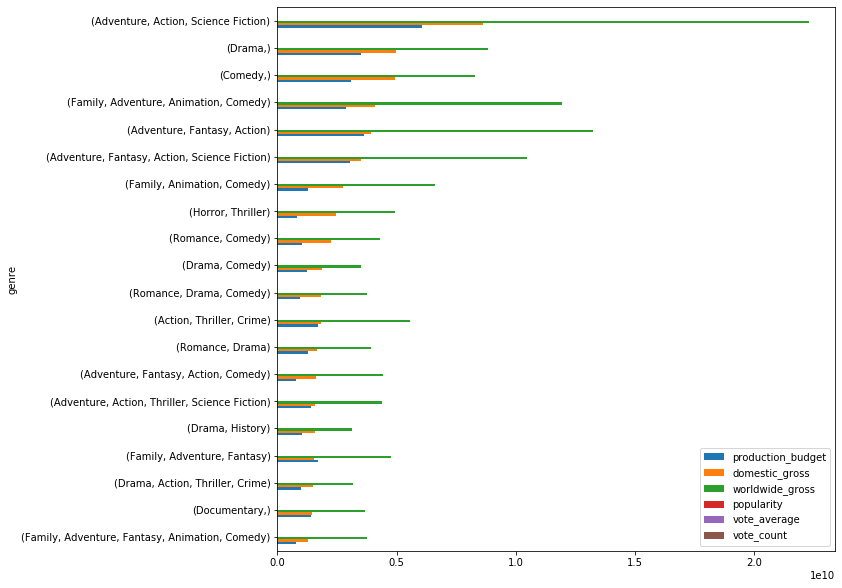

In [43]:
#bm_to_pivot.plot(figsize = (10,10), kind = 'barh')
bm_df.groupby(['genre']).sum().sort_values(by = 'domestic_gross').tail(20).plot(kind = 'barh', figsize =(10,10))

In [232]:
bm2_df = bm_df.groupby(['genre']).filter(lambda x: len(x) > 10) # only capture genres with 10+ movies

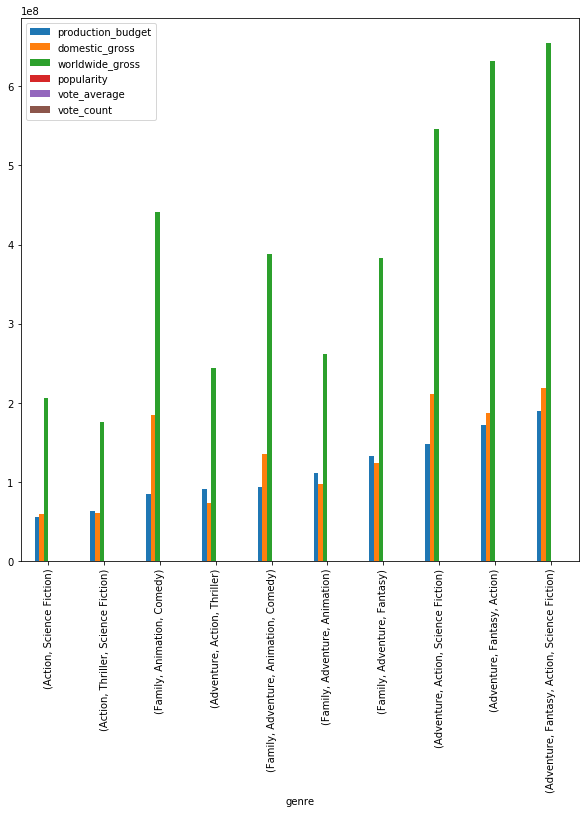

In [258]:
bm2_df.groupby(['genre']).mean().sort_values(by = 'production_budget').tail(10).plot(kind = 'bar', figsize = (10,10))

In [228]:
bm2_df['profit_margin'] = (bm2_df['worldwide_gross'] - bm2_df['production_budget'])/bm2_df['worldwide_gross']

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [241]:
bm2_df.worldwide_gross.replace(to_replace= 0, value = bm2_df['worldwide_gross'].mean(), inplace = True )

C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [244]:
bm2_df.domestic_gross.replace(to_replace = 0, value = bm2_df['domestic_gross'].mean(), inplace = True)

C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [245]:
df = bm2_df.groupby(['genre']).mean()

In [264]:
bm2_df.drop(['production_budget/worldwide_gross', 'production_budget - worldwide_gross'], axis = 1, inplace = True)

KeyError: "['production_budget/worldwide_gross' 'production_budget - worldwide_gross'] not found in axis"

In [295]:
df['profit_margin'] = (df['worldwide_gross'] - df['production_budget'])/(df['worldwide_gross'])

In [320]:
df.reset_index(inplace = True)

In [491]:
profit_margin = df[['genre', 'profit_margin']].sort_values(by = 'profit_margin', ascending = True).tail(10)

#genre
profit_margin
#seaborn.barplot(x = profit_margin['profit_margin'], y = profit_margin['genre'])

,genre,profit_margin
41,"(Romance, Comedy)",0.774125
32,"(Family, Comedy)",0.792402
31,"(Family, Animation, Comedy)",0.807584
40,"(Music, Drama)",0.809051
35,"(Horror,)",0.815839
44,"(Thriller,)",0.849039
33,"(Family, Drama)",0.859743
37,"(Horror, Thriller)",0.864750
36,"(Horror, Comedy)",0.871032
38,"(Horror, Thriller, Mystery)",0.902640


In [497]:
bm_df.isna().sum()

release_datel_suffix    0
production_budget       0
domestic_gross          0
worldwide_gross         0
genre_ids               0
original_language       0
popularity              0
release_dater_suffix    0
vote_average            0
vote_count              0
genre                   0
dtype: int64

In [ ]:
def convert_languages():
    languages = {
        
    }

In [478]:
bm2_df

,title,release_datel_suffix,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,release_dater_suffix,genre
0,Avatar,2009-12-18,425000000,7.605076e+08,2.776345e+09,"[28, 12, 14, 878]",en,2009-12-18,"(Adventure, Fantasy, Action, Science Fiction)"
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,2.410639e+08,1.045664e+09,"[12, 28, 14]",en,2011-05-20,"(Adventure, Fantasy, Action)"
2,Avengers: Age of Ultron,2015-05-01,330600000,4.590059e+08,1.403014e+09,"[28, 12, 878]",en,2015-05-01,"(Adventure, Action, Science Fiction)"
3,Avengers: Infinity War,2018-04-27,300000000,6.788155e+08,2.048134e+09,"[12, 28, 14]",en,2018-04-27,"(Adventure, Fantasy, Action)"
4,Justice League,2017-11-17,300000000,2.290243e+08,6.559452e+08,"[28, 12, 14, 878]",en,2017-11-17,"(Adventure, Fantasy, Action, Science Fiction)"
...,...,...,...,...,...,...,...,...,...
1530,Krisha,2016-03-18,30000,1.448220e+05,1.448220e+05,[18],en,2016-03-18,"(Drama,)"
1531,Emily,2013-06-21,27000,3.547000e+03,3.547000e+03,[18],en,2013-06-21,"(Drama,)"
1532,Exeter,2015-03-26,25000,4.562348e+07,4.897920e+05,"[53, 27]",en,2015-03-26,"(Horror, Thriller)"
1533,Dry Spell,2013-02-14,22000,4.562348e+07,1.093927e+08,"[35, 10749]",en,2013-02-14,"(Romance, Comedy)"


In [489]:
bm2_df.loc[bm2_df['title'] == 'Frozen']

,title,release_datel_suffix,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,release_dater_suffix,genre


In [357]:
bm2_df.reset_index(inplace=True)

In [362]:
bm2_df['release_datel_suffix'] = pd.to_datetime(bm2_df['release_dater_suffix'])

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


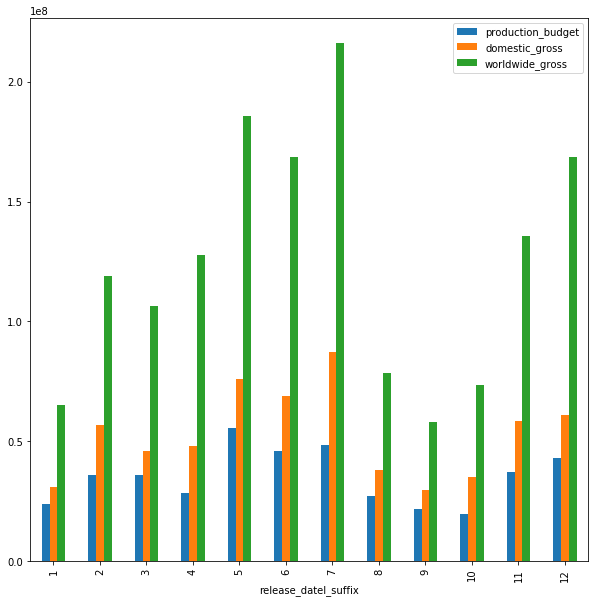

In [488]:
bm2_df.groupby(bm2_df['release_datel_suffix'].dt.month).mean().plot(kind = 'bar', figsize = (10,10))


In [388]:
bm2_df.drop(['popularity', 'vote_average', 'vote_count'], axis = 1 ,inplace = True)

C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [420]:
mv_df = read_df_file('./zippedData/imdb.name.basics.csv.gz')

In [412]:
mv_df.dropna(inplace = True)

In [487]:
bm2_df.duplicated().value_counts()

False    1073
dtype: int64

In [485]:
bm2_df.drop_duplicates(subset = ['title'], keep = False, inplace = True)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [493]:
mv_df

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
